In [79]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('height_value_users1.csv')
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611778 entries, 0 to 611777
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   customer_id    611778 non-null  int64
 1   total_revenue  611778 non-null  int64
dtypes: int64(2)
memory usage: 9.3 MB


In [94]:
df['total_revenue'].sum()

235708754

In [92]:
q = df['total_revenue'].quantile(0.95)
q

980.0

In [59]:
df['total_revenue_q'] = pd.cut(df['total_revenue'], 10)

In [60]:
df.groupby('total_revenue_q',dropna=False)['customer_id'].agg(['count'])

,count
total_revenue_q,
"(94.272, 4106.8]",611096
"(4106.8, 8079.6]",427
"(8079.6, 12052.4]",205
"(12052.4, 16025.2]",20
"(16025.2, 19998.0]",11
"(19998.0, 23970.8]",12
"(23970.8, 27943.6]",1
"(27943.6, 31916.4]",1
"(31916.4, 35889.2]",4


In [65]:
df1 = df.query('total_revenue < 4100')

In [67]:
df1['total_revenue_p'] = pd.cut(df1['total_revenue'], 10)

/var/folders/yg/wf8jyrpd3q723wvhyghcc1v00000gn/T/ipykernel_80105/352529309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['total_revenue_p'] = pd.cut(df1['total_revenue'], 10)


In [74]:
df1.drop(['total_revenue_p'], axis='columns')

,customer_id,total_revenue,total_revenue_q
682,78423302,4095,"(3698.9, 4095.0]"
683,1263445023,4093,"(3698.9, 4095.0]"
684,1347417304,4091,"(3698.9, 4095.0]"
685,1246853897,4087,"(3698.9, 4095.0]"
686,1235654109,4081,"(3698.9, 4095.0]"
...,...,...,...
611773,363283898,134,"(130.039, 530.1]"
611774,188416872,134,"(130.039, 530.1]"
611775,502310742,134,"(130.039, 530.1]"
611776,81022870,134,"(130.039, 530.1]"


In [75]:
df1.groupby('total_revenue_q',dropna=False)['customer_id'].agg(['count'])

,count
total_revenue_q,
"(130.039, 530.1]",480036
"(530.1, 926.2]",60992
"(926.2, 1322.3]",56962
"(1322.3, 1718.4]",5116
"(1718.4, 2114.5]",3776
"(2114.5, 2510.6]",1212
"(2510.6, 2906.7]",2111
"(2906.7, 3302.8]",529
"(3302.8, 3698.9]",229


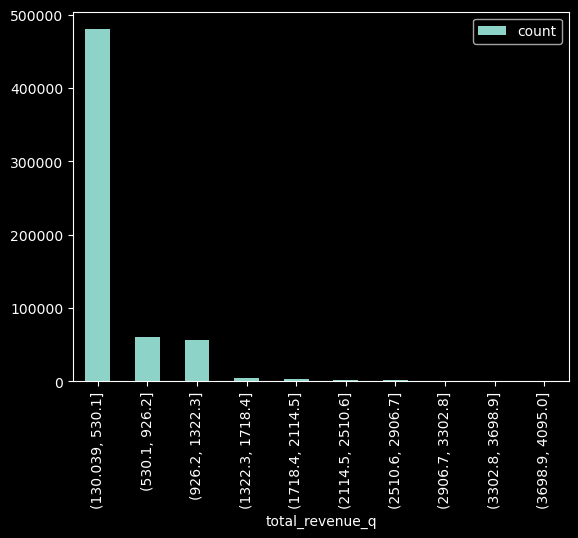

In [87]:
plt.style.use('dark_background')
df1.groupby('total_revenue_q',dropna=False)['customer_id'].agg(['count']).plot(kind='bar')
plt.show()